## Cleaning Data

### First Inspection / Handling inconsistent Data 

In [1]:
import pandas as pd

In [2]:
import numpy as np

#### Titanic Dataset

In [3]:
titanic = pd.read_csv("titanic_imp.csv")

In [4]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN


In [5]:
titanic.tail()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
889,1,1,male,26.0,0,0,$30.0,C,C
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN
893,0,3,male,36.0,0,0,$7.8958,S,NaN


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [7]:
titanic.describe()

,Class,SipSp,ParCh
count,894.000000,894.000000,894.000000
mean,2.309843,0.522371,0.381432
std,0.835370,1.101283,0.805171
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,3.000000,8.000000,6.000000


In [8]:
titanic.describe(include ="O")

,Survived,Gender,Age,Fare,Emb,Deck
count,894,894,758,894,892,203
unique,4,2,92,248,3,7
top,0,male,Missing Data,$8.05,S,C
freq,551,580,41,43,647,59


In [9]:
titanic.Survived.unique()

array(['0', '1', 'yes', 'no'], dtype=object)

In [10]:
titanic.Survived.value_counts()

0      551
1      341
yes      1
no       1
Name: Survived, dtype: int64

In [11]:
titanic.Survived.replace(to_replace= ["yes", "no"], value = [1, 0], inplace = True)

In [12]:
titanic.Survived.value_counts()

0    551
1    341
1      1
0      1
Name: Survived, dtype: int64

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [14]:
titanic.Survived.astype("int")

0      0
1      1
2      1
3      1
4      0
      ..
889    1
890    0
891    0
892    0
893    0
Name: Survived, Length: 894, dtype: int32

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [16]:
titanic.Gender.unique()

array(['male', 'female'], dtype=object)

In [17]:
titanic.Gender.replace(to_replace=["male","female"],value=["M","F"])

0      M
1      F
2      F
3      F
4      M
      ..
889    M
890    M
891    M
892    M
893    M
Name: Gender, Length: 894, dtype: object

In [18]:
titanic.Gender.unique()

array(['male', 'female'], dtype=object)

In [19]:
titanic.Age.value_counts()

Missing Data    41
24.0            31
22.0            27
18.0            26
28.0            25
                ..
55.5             1
66.0             1
0.92             1
23.5             1
74.0             1
Name: Age, Length: 92, dtype: int64

In [20]:
titanic.Age.value_counts(dropna=False)

NaN             136
Missing Data     41
24.0             31
22.0             27
18.0             26
               ... 
55.5              1
66.0              1
0.92              1
23.5              1
74.0              1
Name: Age, Length: 93, dtype: int64

In [21]:
titanic.Age.replace(to_replace="Missing Data",value=np.nan).astype("float")\
.replace(to_replace=np.nan,value=np.mean(titanic.Age.replace(to_replace="Missing Data",value=np.nan).astype("float")))\
.value_counts(dropna=False)

30.718508    177
24.000000     31
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
66.000000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 92, dtype: int64

In [22]:
titanic.Fare.replace(to_replace="$",value="")  # it's not working

0         $7.25
1      $71.2833
2        $7.925
3         $53.1
4         $8.05
         ...   
889       $30.0
890       $7.75
891       $10.5
892       $14.4
893     $7.8958
Name: Fare, Length: 894, dtype: object

In [23]:
titanic.Fare.str.replace("$","")  # showing Warning for not mentioning regex=True

C:\Users\palab\AppData\Local\Temp\ipykernel_6652\2313841483.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titanic.Fare.str.replace("$","")  # showing Warning for not mentioning regex=True


0         7.25
1      71.2833
2        7.925
3         53.1
4         8.05
        ...   
889       30.0
890       7.75
891       10.5
892       14.4
893     7.8958
Name: Fare, Length: 894, dtype: object

In [24]:
titanic.Fare.str.replace("$","",regex=True)

0         7.25
1      71.2833
2        7.925
3         53.1
4         8.05
        ...   
889       30.0
890       7.75
891       10.5
892       14.4
893     7.8958
Name: Fare, Length: 894, dtype: object

In [25]:
titanic.Fare.str.replace("$","",regex=True).astype("float")#.value_counts(dropna=False)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
889    30.0000
890     7.7500
891    10.5000
892    14.4000
893     7.8958
Name: Fare, Length: 894, dtype: float64

#### Olympic Dataset

In [26]:
summer = pd.read_csv("summer_imp.csv")

In [27]:
summer.head()

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold Medal
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [28]:
summer.tail()

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
31165,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31166,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31167,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31168,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31169,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [29]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [31]:
summer.rename(columns = {"Athlete Name": "Athlete_Name"}, inplace = True)

In [32]:
summer.head(20)

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold Medal
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold Medal
7,1896,Athens,Aquatics,Swimming,"Andreou, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"Neumann, Paul",AUT,Men,400M Freestyle,Gold Medal


In [33]:
summer.describe(include='O')

,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
count,31170,31170,31170,31170,31166,31170,31170,31170
unique,22,43,67,22763,147,2,666,4
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,3567,4170,3639,22,4586,22751,1497,10483


In [34]:
summer.Medal.value_counts()

Gold          10483
Bronze        10372
Silver        10311
Gold Medal        4
Name: Medal, dtype: int64

In [35]:
summer.Medal.replace(to_replace= "Gold Medal", value = "Gold", inplace = True)

In [36]:
summer.describe(include = "O")

,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
count,31170,31170,31170,31170,31166,31170,31170,31170
unique,22,43,67,22763,147,2,666,3
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,3567,4170,3639,22,4586,22751,1497,10487


### String Operations

#### Titanic Dataset

In [37]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN


In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [40]:
titanic.Fare = titanic.Fare.str.replace("$", "", regex = True)

In [41]:
titanic.Fare.head()

0       7.25
1    71.2833
2      7.925
3       53.1
4       8.05
Name: Fare, dtype: object

#### Olympic Dataset

In [42]:
summer.head(20)

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"Andreou, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"Neumann, Paul",AUT,Men,400M Freestyle,Gold


In [43]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [44]:
summer.Athlete_Name = summer.Athlete_Name.str.title()

In [45]:
summer.head(10)

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"Andreou, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"Neumann, Paul",AUT,Men,400M Freestyle,Gold


In [46]:
summer.Athlete_Name.str.contains("Hajos")

0         True
1        False
2        False
3        False
4        False
         ...  
31165    False
31166    False
31167    False
31168    False
31169    False
Name: Athlete_Name, Length: 31170, dtype: bool

In [47]:
summer.loc[summer.Athlete_Name.str.contains("Hajos")]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold


In [48]:
summer.loc[summer.Athlete_Name.str.contains("Hajos") | summer.Athlete_Name.str.contains("Neumann")]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"Neumann, Paul",AUT,Men,400M Freestyle,Gold
5153,1928,Amsterdam,Athletics,Athletics,"Neumann, Otto",GER,Men,4X400M Relay,Silver
5275,1928,Amsterdam,Equestrian,Eventing,"Neumann, Bruno",GER,Men,Individual,Bronze
6207,1932,Los Angeles,Rowing,Rowing,"Neumann, Karl-Heinz",GER,Men,Four-Oared Shell With Coxswain (4-),Gold
7751,1948,London,Gymnastics,Artistic G.,"Elste-Neumann, Meta",USA,Women,Team Competition,Bronze
20350,1992,Barcelona,Cycling,Cycling Track,"Neumann, Annett",GER,Women,Sprint,Silver


In [49]:
summer.loc[summer.Athlete_Name.str.contains("Neumann") & summer.Country.str.contains("GER")]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
5153,1928,Amsterdam,Athletics,Athletics,"Neumann, Otto",GER,Men,4X400M Relay,Silver
5275,1928,Amsterdam,Equestrian,Eventing,"Neumann, Bruno",GER,Men,Individual,Bronze
6207,1932,Los Angeles,Rowing,Rowing,"Neumann, Karl-Heinz",GER,Men,Four-Oared Shell With Coxswain (4-),Gold
20350,1992,Barcelona,Cycling,Cycling Track,"Neumann, Annett",GER,Women,Sprint,Silver


In [50]:
summer.iloc[0, 4]

' Hajos, Alfred '

In [51]:
summer.iloc[[3, 2]]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze


In [52]:
summer.iloc[:,[2,3]]

,Sport,Discipline
0,Aquatics,Swimming
1,Aquatics,Swimming
2,Aquatics,Swimming
3,Aquatics,Swimming
4,Aquatics,Swimming
...,...,...
31165,Wrestling,Wrestling Freestyle
31166,Wrestling,Wrestling Freestyle
31167,Wrestling,Wrestling Freestyle
31168,Wrestling,Wrestling Freestyle


In [53]:
summer.iloc[[3, 2],2]

3    Aquatics
2    Aquatics
Name: Sport, dtype: object

In [54]:
summer.iloc[2,[2,3,4]]

Sport                      Aquatics
Discipline                 Swimming
Athlete_Name     Drivas, Dimitrios 
Name: 2, dtype: object

In [55]:
summer.iloc[:,2]

0         Aquatics
1         Aquatics
2         Aquatics
3         Aquatics
4         Aquatics
           ...    
31165    Wrestling
31166    Wrestling
31167    Wrestling
31168    Wrestling
31169    Wrestling
Name: Sport, Length: 31170, dtype: object

In [56]:
summer.iloc[[3, 2],[2,3]]

,Sport,Discipline
3,Aquatics,Swimming
2,Aquatics,Swimming


In [57]:
summer.Athlete_Name = summer.Athlete_Name.str.strip()

In [58]:
summer.loc[summer.Athlete_Name == "Hajos, Alfred"]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold


In [59]:
summer.loc[summer.Athlete_Name == "Phelps, Michael"]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
25229,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,100M Butterfly,Gold
25257,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,200M Butterfly,Gold
25262,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,200M Freestyle,Bronze
25269,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,200M Individual Medley,Gold
25281,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,400M Individual Medley,Gold
25290,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,4X100M Freestyle Relay,Bronze
25329,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,4X100M Medley Relay,Gold
25365,2004,Athens,Aquatics,Swimming,"Phelps, Michael",USA,Men,4X200M Freestyle Relay,Gold
27228,2008,Beijing,Aquatics,Swimming,"Phelps, Michael",USA,Men,100M Butterfly,Gold
27256,2008,Beijing,Aquatics,Swimming,"Phelps, Michael",USA,Men,200M Butterfly,Gold


### Changing DataType with astype() / pd.to_numeric

#### Titanic Dataset

In [60]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,7.25,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.925,S,NaN
3,1,1,female,35.0,1,0,53.1,S,C
4,0,3,male,35.0,0,0,8.05,S,NaN


In [61]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [62]:
pd.to_numeric(titanic.Fare)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
889    30.0000
890     7.7500
891    10.5000
892    14.4000
893     7.8958
Name: Fare, Length: 894, dtype: float64

In [63]:
titanic.Fare.astype("float")

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
889    30.0000
890     7.7500
891    10.5000
892    14.4000
893     7.8958
Name: Fare, Length: 894, dtype: float64

In [64]:
titanic["Fare"] = titanic.Fare.astype("float")

In [65]:
titanic["Survived"] = titanic.Survived.astype("int")

In [66]:
#titanic["Age"] = titanic.Age.astype("float")

In [67]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       758 non-null    object 
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 59.5+ KB


In [68]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


#### Olympic Dataset

In [69]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [70]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


### Intro to NA Values

In [71]:
import numpy as np

In [72]:
sales = pd.read_csv("sales.csv", index_col = 0)

In [73]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [74]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     4 non-null      int64  
 2   Wed     4 non-null      int64  
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 192.0+ bytes


In [75]:
sales.loc["Steven", "Thu"]

nan

In [76]:
sales.iloc[1,1] = None

In [77]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27.0,15,NaN,33
Mike,45,NaN,74,87.0,12
Andi,17,33.0,54,8.0,29
Paul,87,67.0,27,45.0,7


In [78]:
sales.iloc[2,2] = np.nan

In [79]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27.0,15.0,NaN,33
Mike,45,NaN,74.0,87.0,12
Andi,17,33.0,NaN,8.0,29
Paul,87,67.0,27.0,45.0,7


In [80]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     3 non-null      float64
 2   Wed     3 non-null      float64
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(3), int64(2)
memory usage: 364.0+ bytes


#### Titanic Dataset

In [81]:
titanic.head(10)

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,Missing Data,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [82]:
titanic.tail(10)

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
884,0,3,male,25.0,0,0,7.0500,S,NaN
885,0,3,female,39.0,0,5,29.1250,Q,NaN
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C
890,0,3,male,32.0,0,0,7.7500,Q,NaN
891,0,2,male,24.0,0,0,10.5000,S,NaN
892,0,3,male,34.0,1,1,14.4000,S,NaN
893,0,3,male,36.0,0,0,7.8958,S,NaN


In [83]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       758 non-null    object 
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 59.5+ KB


In [84]:
titanic.isna()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
889,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,True
891,False,False,False,False,False,False,False,False,True
892,False,False,False,False,False,False,False,False,True


In [85]:
titanic.isna().sum(axis = 0)

Survived      0
Class         0
Gender        0
Age         136
SipSp         0
ParCh         0
Fare          0
Emb           2
Deck        691
dtype: int64

In [86]:
titanic.isna().sum(axis = 1)

0      1
1      0
2      1
3      0
4      1
      ..
889    0
890    1
891    1
892    1
893    1
Length: 894, dtype: int64

In [87]:
titanic[titanic.isna().sum(axis = 1)>1]#.value_counts()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
201,0,3,male,NaN,8,2,69.5500,S,NaN
214,0,3,male,NaN,1,0,7.7500,Q,NaN
223,0,3,male,NaN,0,0,7.8958,S,NaN
229,0,3,female,NaN,3,1,25.4667,S,NaN
235,0,3,female,NaN,0,0,7.5500,S,NaN
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,NaN
863,0,3,female,NaN,8,2,69.5500,S,NaN
868,0,3,male,NaN,0,0,9.5000,S,NaN
878,0,3,male,NaN,0,0,7.8958,S,NaN


In [88]:
titanic.isna().any(axis = 0)

Survived    False
Class       False
Gender      False
Age          True
SipSp       False
ParCh       False
Fare        False
Emb          True
Deck         True
dtype: bool

In [89]:
titanic.isna().any(axis = 1)

0       True
1      False
2       True
3      False
4       True
       ...  
889    False
890     True
891     True
892     True
893     True
Length: 894, dtype: bool

In [90]:
titanic.isna().any(axis = 1).value_counts()

True     707
False    187
dtype: int64

In [91]:
titanic[titanic.isna().any(axis = 1)] # No. of records containing atleast 1 NaN Value

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
2,1,3,female,26.0,0,0,7.9250,S,NaN
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,Missing Data,0,0,8.4583,Q,NaN
7,0,3,male,2.0,3,1,21.0750,S,NaN
...,...,...,...,...,...,...,...,...,...
888,0,3,female,NaN,1,2,23.4500,S,NaN
890,0,3,male,32.0,0,0,7.7500,Q,NaN
891,0,2,male,24.0,0,0,10.5000,S,NaN
892,0,3,male,34.0,1,1,14.4000,S,NaN


In [92]:
titanic.notna()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
889,True,True,True,True,True,True,True,True,True
890,True,True,True,True,True,True,True,True,False
891,True,True,True,True,True,True,True,True,False
892,True,True,True,True,True,True,True,True,False


In [93]:
titanic.notna().all(axis = 0)

Survived     True
Class        True
Gender       True
Age         False
SipSp        True
ParCh        True
Fare         True
Emb         False
Deck        False
dtype: bool

In [94]:
titanic.notna().all(axis = 1) # No. of records containing all NaN Value

0      False
1       True
2      False
3       True
4      False
       ...  
889     True
890    False
891    False
892    False
893    False
Length: 894, dtype: bool

In [95]:
titanic.notna().sum(axis = 1)

0      8
1      9
2      8
3      9
4      8
      ..
889    9
890    8
891    8
892    8
893    8
Length: 894, dtype: int64

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

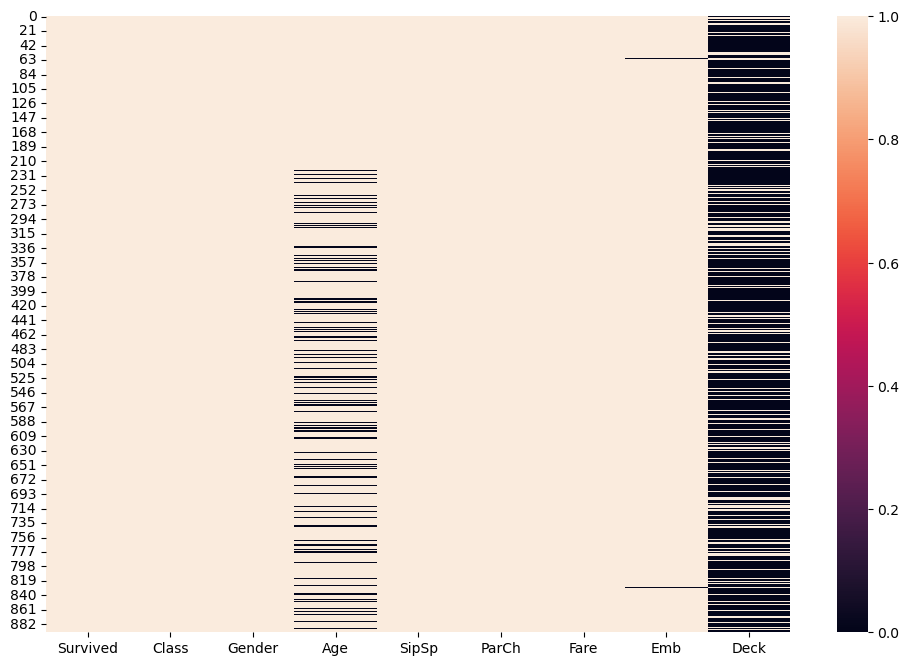

In [97]:
plt.figure(figsize = (12,8))
sns.heatmap(titanic.notna())
plt.show()

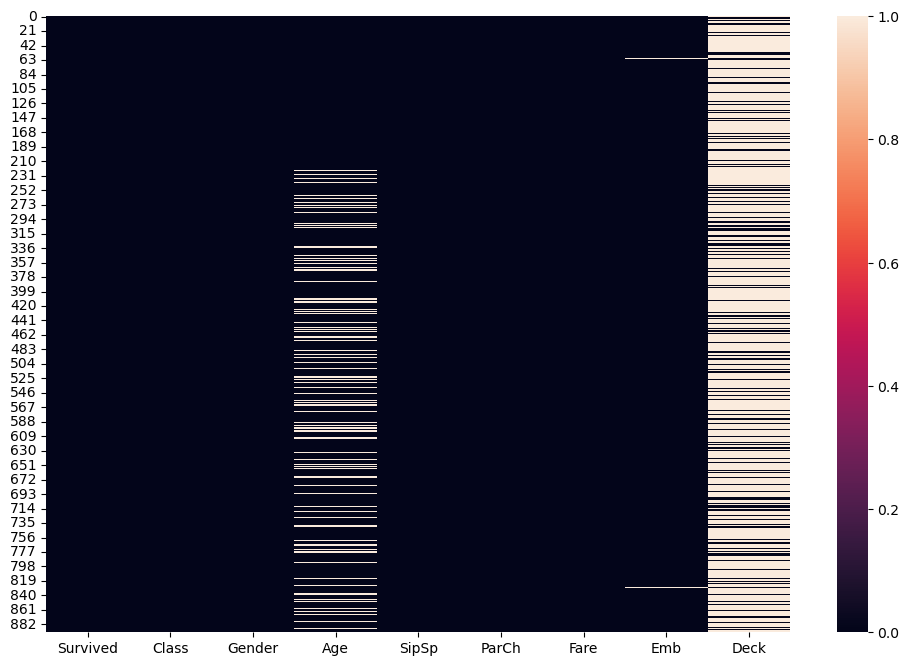

In [98]:
plt.figure(figsize = (12,8))
sns.heatmap(titanic.isna())
plt.show()

In [99]:
titanic.Age.value_counts(dropna = False)

NaN             136
Missing Data     41
24.0             31
22.0             27
18.0             26
               ... 
55.5              1
66.0              1
0.92              1
23.5              1
74.0              1
Name: Age, Length: 93, dtype: int64

In [100]:
titanic.Age.replace(to_replace= "Missing Data", value = np.nan, inplace= True)

In [101]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    object 
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 59.5+ KB


In [102]:
titanic.Age = titanic.Age.astype("float")

#### Olympic Dataset

In [103]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [104]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [105]:
summer.isna().any(axis = 1)

0        False
1        False
2        False
3        False
4        False
         ...  
31165    False
31166    False
31167    False
31168    False
31169    False
Length: 31170, dtype: bool

In [106]:
summer[summer.isna().any(axis = 1)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
29608,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31077,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31096,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31115,2012,London,Wrestling,Wrestling Freestyle,"Kudukhov, Besik",NaN,Men,Wf 60 KG,Silver


### Removing Missing Values with dropna()

#### Titanic Dataset

In [107]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [108]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 59.5+ KB


In [109]:
titanic[titanic.Emb.isna()]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
61,1,1,female,38.0,0,0,80.0,NaN,B
829,1,1,female,62.0,0,0,80.0,NaN,B


In [110]:
titanic.Age.value_counts(dropna = False)

NaN      177
24.00     31
22.00     27
18.00     26
28.00     25
        ... 
55.50      1
66.00      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 92, dtype: int64

In [111]:
titanic.Age.mean(skipna = True)

30.718507670850766

In [112]:
titanic.shape

(894, 9)

In [113]:
titanic.dropna().shape

(182, 9)

In [114]:
titanic.dropna(axis = 0, how = "any").shape

(182, 9)

In [115]:
titanic.dropna(axis = 1, how = "any").shape

(894, 6)

In [116]:
titanic.dropna(axis = 0, how = "all").shape

(894, 9)

In [117]:
titanic.dropna(axis = 1, how = "all").shape

(894, 9)

In [118]:
titanic.dropna(axis = 0, thresh = 8).shape

(736, 9)

In [119]:
titanic.dropna(axis = 1, thresh = 500).shape

(894, 8)

In [120]:
titanic.dropna(axis = 1, thresh = 500, inplace = True)

In [121]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [122]:
titanic.shape

(894, 8)

In [123]:
titanic.dropna(axis = 0, subset = ["Survived", "Class", "Gender", "Age"], how = "any").shape

(717, 8)

#### Olympic Dataset

In [124]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [125]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [126]:
summer.isna().any(axis = 1)

0        False
1        False
2        False
3        False
4        False
         ...  
31165    False
31166    False
31167    False
31168    False
31169    False
Length: 31170, dtype: bool

In [127]:
summer[summer.isna().any(axis = 1)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
29608,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31077,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31096,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31115,2012,London,Wrestling,Wrestling Freestyle,"Kudukhov, Besik",NaN,Men,Wf 60 KG,Silver


In [128]:
summer.dropna(inplace = True)

In [129]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31166 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31166 non-null  int64 
 1   City          31166 non-null  object
 2   Sport         31166 non-null  object
 3   Discipline    31166 non-null  object
 4   Athlete_Name  31166 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31166 non-null  object
 7   Event         31166 non-null  object
 8   Medal         31166 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


### Replacing Missing Values with fillna()

#### Titanic Dataset

In [130]:
titanic.head(10)

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [131]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.5+ KB


In [132]:
titanic.Age.mean()

30.718507670850766

In [133]:
mean = round(titanic.Age.mean(),1)
mean

30.7

In [134]:
titanic.Age.fillna(mean, inplace = True)

In [135]:
titanic.head(6)

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,30.7,0,0,8.4583,Q


In [136]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       894 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.5+ KB


### Detection of Duplicates

In [137]:
alphabet = pd.DataFrame(["a", "b", "c", "c", "d", "e", "f", "g", "g", "g"], columns = ["Alphabet"])

In [138]:
alphabet

,Alphabet
0,a
1,b
2,c
3,c
4,d
5,e
6,f
7,g
8,g
9,g


In [139]:
alphabet.duplicated(keep = "first")

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8     True
9     True
dtype: bool

In [140]:
alphabet.duplicated(keep="last")

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7     True
8     True
9    False
dtype: bool

In [141]:
alphabet[alphabet.duplicated(keep = "first")]

,Alphabet
3,c
8,g
9,g


In [142]:
alphabet[~alphabet.duplicated(keep="first")]

,Alphabet
0,a
1,b
2,c
4,d
5,e
6,f
7,g


In [150]:
alphabet[alphabet.duplicated(keep=False)]

,Alphabet
2,c
3,c
7,g
8,g
9,g


In [151]:
alphabet[~alphabet.duplicated(keep=False)]

,Alphabet
0,a
1,b
4,d
5,e
6,f


#### Titanic Dataset

In [152]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [153]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       894 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.5+ KB


In [154]:
titanic.duplicated(keep = "first", subset = ["Survived", "Class"]).sum()

888

In [161]:
titanic.duplicated(keep="first",subset=["Survived","Class","Gender","Age","SipSp","ParCh","Fare","Emb"]).sum()

114

In [163]:
titanic[titanic.duplicated(keep = False)].sort_values(by=["Survived","Class","Gender","Age","SipSp","ParCh","Fare","Emb"])

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
633,0,1,male,30.7,0,0,0.0000,S
815,0,1,male,30.7,0,0,0.0000,S
64,0,1,male,30.7,0,0,27.7208,C
295,0,1,male,30.7,0,0,27.7208,C
252,0,1,male,62.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
692,1,3,male,30.7,0,0,56.4958,S
65,1,3,male,30.7,1,1,15.2458,C
709,1,3,male,30.7,1,1,15.2458,C
74,1,3,male,32.0,0,0,56.4958,S


In [170]:
titanic[titanic.duplicated(keep = False)]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
4,0,3,male,35.0,0,0,8.0500,S
26,0,3,male,30.7,0,0,7.2250,C
28,1,3,female,30.7,0,0,7.8792,Q
29,0,3,male,30.7,0,0,7.8958,S
32,1,3,female,30.7,0,0,7.7500,Q
...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
891,0,2,male,24.0,0,0,10.5000,S
892,0,3,male,34.0,1,1,14.4000,S


In [171]:
titanic[~titanic.duplicated(keep = False)]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,30.7,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.7,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [172]:
titanic[titanic.duplicated(keep = "first")]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
47,1,3,female,30.7,0,0,7.7500,Q
76,0,3,male,30.7,0,0,7.8958,S
77,0,3,male,30.7,0,0,8.0500,S
87,0,3,male,30.7,0,0,8.0500,S
95,0,3,male,30.7,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
891,0,2,male,24.0,0,0,10.5000,S
892,0,3,male,34.0,1,1,14.4000,S


In [173]:
titanic[~titanic.duplicated(keep = "first")]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.7,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### Olypmic Dataset

In [174]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [175]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31166 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31166 non-null  int64 
 1   City          31166 non-null  object
 2   Sport         31166 non-null  object
 3   Discipline    31166 non-null  object
 4   Athlete_Name  31166 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31166 non-null  object
 7   Event         31166 non-null  object
 8   Medal         31166 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


In [176]:
summer.duplicated(keep = "first").sum()

7

In [177]:
summer[summer.duplicated(keep = False)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
2068,1912,Stockholm,Athletics,Athletics,"Lelong, Charles Louis",FRA,Men,4X400M Relay,Silver
2069,1912,Stockholm,Athletics,Athletics,"Lelong, Charles Louis",FRA,Men,4X400M Relay,Silver
12252,1968,Mexico,Fencing,Fencing,"Kalmar, Janos",HUN,Men,Sabre Team,Bronze
12253,1968,Mexico,Fencing,Fencing,"Kalmar, Janos",HUN,Men,Sabre Team,Bronze
15595,1980,Moscow,Boxing,Boxing,"Mustafov, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
15596,1980,Moscow,Boxing,Boxing,"Mustafov, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
16101,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
21832,1996,Atlanta,Baseball,Baseball,"Scull, Antonio",CUB,Men,Baseball,Gold
21833,1996,Atlanta,Baseball,Baseball,"Scull, Antonio",CUB,Men,Baseball,Gold


In [180]:
summer[summer.duplicated(keep = False)].sort_values(by=list(summer.columns))

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
2068,1912,Stockholm,Athletics,Athletics,"Lelong, Charles Louis",FRA,Men,4X400M Relay,Silver
2069,1912,Stockholm,Athletics,Athletics,"Lelong, Charles Louis",FRA,Men,4X400M Relay,Silver
12252,1968,Mexico,Fencing,Fencing,"Kalmar, Janos",HUN,Men,Sabre Team,Bronze
12253,1968,Mexico,Fencing,Fencing,"Kalmar, Janos",HUN,Men,Sabre Team,Bronze
15595,1980,Moscow,Boxing,Boxing,"Mustafov, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
15596,1980,Moscow,Boxing,Boxing,"Mustafov, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
16101,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
21832,1996,Atlanta,Baseball,Baseball,"Scull, Antonio",CUB,Men,Baseball,Gold
21833,1996,Atlanta,Baseball,Baseball,"Scull, Antonio",CUB,Men,Baseball,Gold


In [181]:
summer.loc[(summer.Sport == "Basketball") & (summer.Year == 2012)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
29801,2012,London,Basketball,Basketball,"Anthony, Carmelo",USA,Men,Basketball,Gold
29802,2012,London,Basketball,Basketball,"Bryant, Kobe",USA,Men,Basketball,Gold
29803,2012,London,Basketball,Basketball,"Chandler, Tyson",USA,Men,Basketball,Gold
29804,2012,London,Basketball,Basketball,"Davis, Anthony",USA,Men,Basketball,Gold
29805,2012,London,Basketball,Basketball,"Durant, Kevin",USA,Men,Basketball,Gold
...,...,...,...,...,...,...,...,...,...
29868,2012,London,Basketball,Basketball,"Macleod, Kathleen",AUS,Women,Basketball,Bronze
29869,2012,London,Basketball,Basketball,"Ohea, Jenna",AUS,Women,Basketball,Bronze
29870,2012,London,Basketball,Basketball,"Richards, Samantha",AUS,Women,Basketball,Bronze
29871,2012,London,Basketball,Basketball,"Screen, Jennifer",AUS,Women,Basketball,Bronze


### Handling / Removing Duplicates

#### Titanic Dataset

In [182]:
titanic.tail()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
889,1,1,male,26.0,0,0,30.0000,C
890,0,3,male,32.0,0,0,7.7500,Q
891,0,2,male,24.0,0,0,10.5000,S
892,0,3,male,34.0,1,1,14.4000,S
893,0,3,male,36.0,0,0,7.8958,S


In [183]:
titanic.duplicated().sum()

114

In [184]:
titanic[titanic.duplicated()]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
47,1,3,female,30.7,0,0,7.7500,Q
76,0,3,male,30.7,0,0,7.8958,S
77,0,3,male,30.7,0,0,8.0500,S
87,0,3,male,30.7,0,0,8.0500,S
95,0,3,male,30.7,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
891,0,2,male,24.0,0,0,10.5000,S
892,0,3,male,34.0,1,1,14.4000,S


In [185]:
titanic.drop(index = [891, 892, 893], inplace = True)

In [186]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [187]:
titanic.tail()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,30.7,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [188]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Class     891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       891 non-null    float64
 4   SipSp     891 non-null    int64  
 5   ParCh     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Emb       889 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB


#### Olympic Dataset

In [189]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [190]:
summer[summer.duplicated(keep = False)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
2068,1912,Stockholm,Athletics,Athletics,"Lelong, Charles Louis",FRA,Men,4X400M Relay,Silver
2069,1912,Stockholm,Athletics,Athletics,"Lelong, Charles Louis",FRA,Men,4X400M Relay,Silver
12252,1968,Mexico,Fencing,Fencing,"Kalmar, Janos",HUN,Men,Sabre Team,Bronze
12253,1968,Mexico,Fencing,Fencing,"Kalmar, Janos",HUN,Men,Sabre Team,Bronze
15595,1980,Moscow,Boxing,Boxing,"Mustafov, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
15596,1980,Moscow,Boxing,Boxing,"Mustafov, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
16101,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
21832,1996,Atlanta,Baseball,Baseball,"Scull, Antonio",CUB,Men,Baseball,Gold
21833,1996,Atlanta,Baseball,Baseball,"Scull, Antonio",CUB,Men,Baseball,Gold


In [191]:
summer.drop(index = [2069, 12253, 15596, 21833, 28678], inplace = True)

In [192]:
summer[summer.duplicated(keep = False)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
16101,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
29784,2012,London,Badminton,Badminton,"Zhao, Yunlei",CHN,Women,Doubles,Gold
29790,2012,London,Badminton,Badminton,"Zhao, Yunlei",CHN,Women,Doubles,Gold


In [193]:
summer.loc[16085:16110]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
16085,1980,Moscow,Hockey,Hockey,"Pleshakov, Sergei",URS,Men,Hockey,Bronze
16086,1980,Moscow,Hockey,Hockey,"Pleshakov, Vladimir",URS,Men,Hockey,Bronze
16087,1980,Moscow,Hockey,Hockey,"Sychev, Aleksandr",URS,Men,Hockey,Bronze
16088,1980,Moscow,Hockey,Hockey,"Zagorodnev, Oleg",URS,Men,Hockey,Bronze
16089,1980,Moscow,Hockey,Hockey,"Zigangirov, Farit",URS,Men,Hockey,Bronze
16090,1980,Moscow,Hockey,Hockey,"Allan, Schofield",IND,Men,Hockey,Gold
16091,1980,Moscow,Hockey,Hockey,"Amarjit Rana, Singh",IND,Men,Hockey,Gold
16092,1980,Moscow,Hockey,Hockey,"Baskaran, Baskaran",IND,Men,Hockey,Gold
16093,1980,Moscow,Hockey,Hockey,"Chettri, Chettri",IND,Men,Hockey,Gold
16094,1980,Moscow,Hockey,Hockey,"Deavinder, Singh",IND,Men,Hockey,Gold


In [194]:
summer.loc[29780:29795]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
29780,2012,London,Badminton,Badminton,"Mogensen, Carsten",DEN,Men,Doubles,Silver
29781,2012,London,Badminton,Badminton,"Chung, Jaesung",KOR,Men,Doubles,Bronze
29782,2012,London,Badminton,Badminton,"Lee, Yong Dae",KOR,Men,Doubles,Bronze
29783,2012,London,Badminton,Badminton,"Tian, Qing",CHN,Women,Doubles,Gold
29784,2012,London,Badminton,Badminton,"Zhao, Yunlei",CHN,Women,Doubles,Gold
29785,2012,London,Badminton,Badminton,"Fujii, Mizuki",JPN,Women,Doubles,Silver
29786,2012,London,Badminton,Badminton,"Kakiiwa, Reika",JPN,Women,Doubles,Silver
29787,2012,London,Badminton,Badminton,"Sorokina, Valeria",RUS,Women,Doubles,Bronze
29788,2012,London,Badminton,Badminton,"Vislova, Nina",RUS,Women,Doubles,Bronze
29789,2012,London,Badminton,Badminton,"Zhang, Nan",CHN,Men,Doubles,Gold


In [195]:
alphabet[alphabet.duplicated(keep = False)]

,Alphabet
2,c
3,c
7,g
8,g
9,g


In [196]:
alphabet.drop_duplicates()

,Alphabet
0,a
1,b
2,c
4,d
5,e
6,f
7,g


In [197]:
alphabet

,Alphabet
0,a
1,b
2,c
3,c
4,d
5,e
6,f
7,g
8,g
9,g


In [198]:
alphabet.drop_duplicates(inplace=True)

In [200]:
alphabet

,Alphabet
0,a
1,b
2,c
4,d
5,e
6,f
7,g


In [201]:
alphab = pd.DataFrame(["a", "b", "c", "c", "d", "e", "f", "g", "g", "g"], columns = ["Alphabet"])

In [202]:
alphab

,Alphabet
0,a
1,b
2,c
3,c
4,d
5,e
6,f
7,g
8,g
9,g


In [203]:
alphab.drop_duplicates(keep=False)

,Alphabet
0,a
1,b
4,d
5,e
6,f


In [204]:
alphab

,Alphabet
0,a
1,b
2,c
3,c
4,d
5,e
6,f
7,g
8,g
9,g


In [206]:
alphab.drop_duplicates(keep=False,inplace=True)

In [207]:
alphab

,Alphabet
0,a
1,b
4,d
5,e
6,f


### The ignore_index parameter (NEW in Pandas 1.0)

In [ ]:
import pandas as pd

In [208]:
alphabe = pd.DataFrame(["a", "b", "c", "c", "d", "e", "f", "g", "g", "g"], columns = ["Alphabet"])

In [209]:
alphabe

,Alphabet
0,a
1,b
2,c
3,c
4,d
5,e
6,f
7,g
8,g
9,g


In [210]:
alphabe.drop_duplicates(ignore_index= True)

,Alphabet
0,a
1,b
2,c
3,d
4,e
5,f
6,g


# Choosing one record from Duplicate records other than "first" and "last"

In [211]:
alphabe

,Alphabet
0,a
1,b
2,c
3,c
4,d
5,e
6,f
7,g
8,g
9,g


In [264]:
alphabe[alphabe.duplicated(keep=False)].sort_values(by="Alphabet")

,Alphabet
2,c
3,c
7,g
8,g
9,g


In [263]:
alphabe[alphabe.duplicated(keep=False)].sort_values(by="Alphabet").groupby("Alphabet").cumcount()

2    0
3    1
7    0
8    1
9    2
dtype: int64

In [229]:
alphabe[alphabe.duplicated(keep=False)].sort_values(by="Alphabet").groupby("Alphabet").cumcount()+1

2    1
3    2
7    1
8    2
9    3
dtype: int64

In [265]:
alphabe.sort_values(by="Alphabet").groupby("Alphabet").cumcount()+1

0    1
1    1
2    1
3    2
4    1
5    1
6    1
7    1
8    2
9    3
dtype: int64

In [266]:
alphabe[alphabe.sort_values(by="Alphabet").groupby("Alphabet").cumcount()+1==2]

,Alphabet
3,c
8,g


In [230]:
(alphabe[alphabe.duplicated(keep=False)].sort_values(by="Alphabet").groupby("Alphabet").cumcount()+1)==2

2    False
3     True
7    False
8     True
9    False
dtype: bool

In [234]:
(alphabe[alphabe.duplicated(keep=False)].sort_values(by="Alphabet").groupby("Alphabet").cumcount()+1)\
[(alphabe[alphabe.duplicated(keep=False)].sort_values(by="Alphabet").groupby("Alphabet").cumcount()+1)==2]\
.index

Int64Index([3, 8], dtype='int64')

In [249]:
Withou_dupl=alphabe[~alphabe.duplicated(keep=False)]

In [250]:
Withou_dupl

,Alphabet
0,a
1,b
4,d
5,e
6,f


## Code for window function .groupby().cumcount()

In [251]:
Second_dupl=alphabe.iloc[(alphabe[alphabe.duplicated(keep=False)].sort_values(by="Alphabet").groupby("Alphabet").cumcount()+1)\
[(alphabe[alphabe.duplicated(keep=False)].sort_values(by="Alphabet").groupby("Alphabet").cumcount()+1)==2]\
.index,:]

In [252]:
Second_dupl

,Alphabet
3,c
8,g


In [257]:
pd.concat([Withou_dupl,Second_dupl])

,Alphabet
0,a
1,b
4,d
5,e
6,f
3,c
8,g


In [258]:
pd.concat([Withou_dupl,Second_dupl]).sort_index()

,Alphabet
0,a
1,b
3,c
4,d
5,e
6,f
8,g


In [259]:
pd.concat([Withou_dupl,Second_dupl]).reset_index()

,index,Alphabet
0,0,a
1,1,b
2,4,d
3,5,e
4,6,f
5,3,c
6,8,g


In [261]:
pd.concat([Withou_dupl,Second_dupl]).reset_index(drop=True)

,Alphabet
0,a
1,b
2,d
3,e
4,f
5,c
6,g


In [260]:
pd.concat([Withou_dupl,Second_dupl]).sort_index().reset_index()

,index,Alphabet
0,0,a
1,1,b
2,3,c
3,4,d
4,5,e
5,6,f
6,8,g


In [262]:
pd.concat([Withou_dupl,Second_dupl]).sort_index().reset_index(drop=True)

,Alphabet
0,a
1,b
2,c
3,d
4,e
5,f
6,g


### Detection of Outliers

In [267]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [268]:
titanic.describe()

,Survived,Class,Age,SipSp,ParCh,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,30.712761,0.523008,0.381594,32.204208
std,0.486592,0.836071,21.588838,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.700000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,490.000000,8.000000,6.000000,512.329200


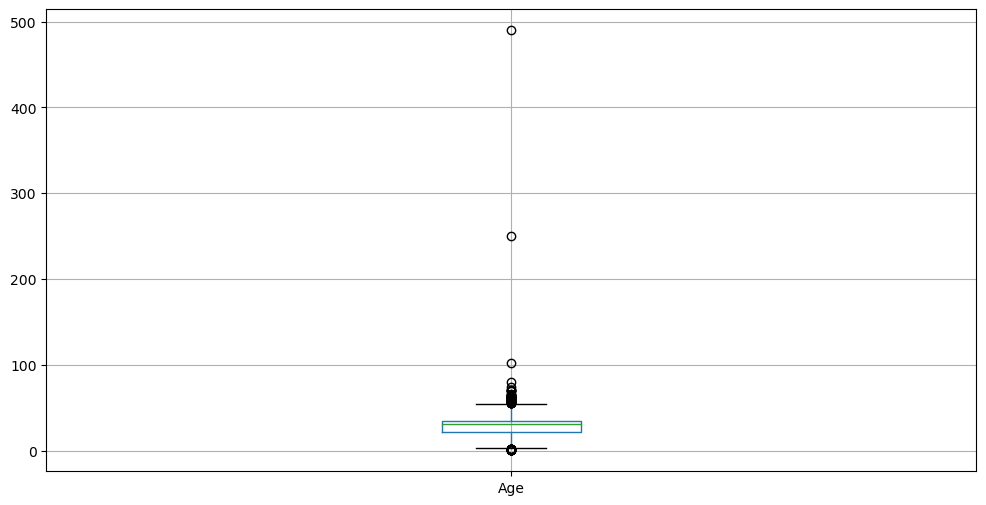

In [269]:
plt.figure(figsize = (12,6))
titanic.boxplot("Age")
plt.show()

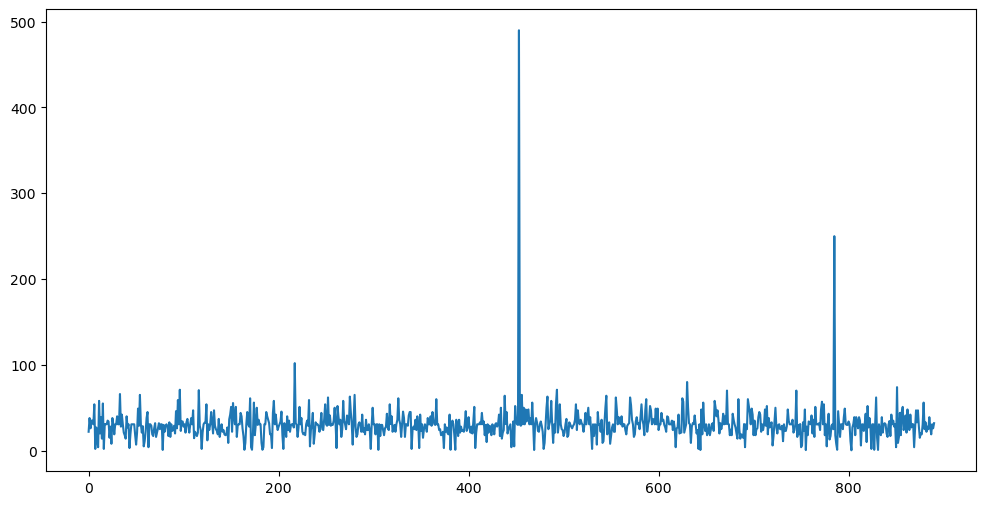

In [270]:
plt.figure(figsize = (12,6))
titanic.Age.plot()
plt.show()

In [271]:
titanic.Age.sort_values(ascending = False)

453    490.00
785    250.00
217    102.00
630     80.00
851     74.00
        ...  
831      0.83
469      0.75
644      0.75
755      0.67
803      0.42
Name: Age, Length: 891, dtype: float64

In [272]:
titanic.loc[titanic.Age > 90]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
217,0,2,male,102.0,1,0,27.0000,S
453,1,1,male,490.0,1,0,89.1042,C
785,0,3,male,250.0,0,0,7.2500,S


In [273]:
titanic.Fare.sort_values(ascending = False)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: Fare, Length: 891, dtype: float64

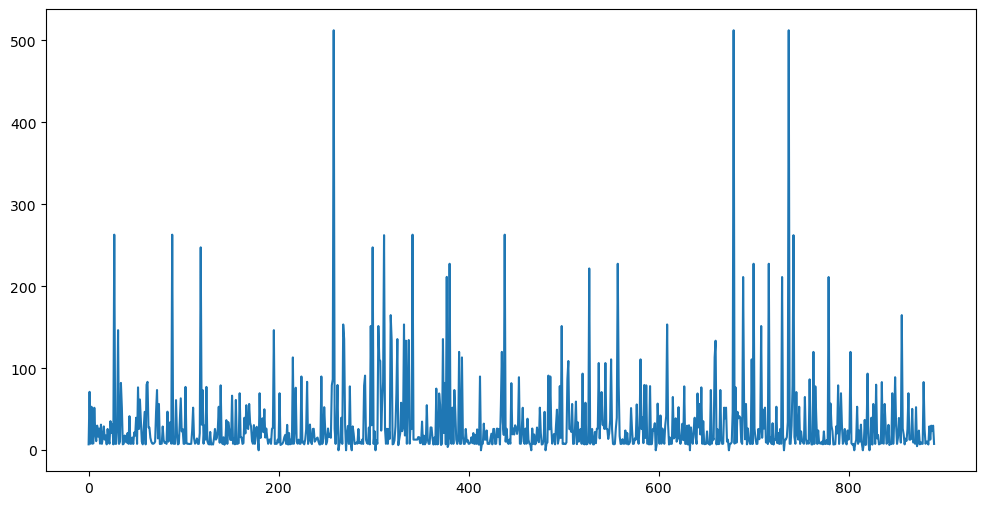

In [274]:
plt.figure(figsize = (12,6))
titanic.Fare.plot()
plt.show()

### Handling / Removing Outliers

#### Titanic Dataset

In [275]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [276]:
titanic.loc[titanic.Age > 90]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
217,0,2,male,102.0,1,0,27.0000,S
453,1,1,male,490.0,1,0,89.1042,C
785,0,3,male,250.0,0,0,7.2500,S


In [277]:
index_outl  = titanic.loc[titanic.Age > 90].index

In [278]:
index_outl

Int64Index([217, 453, 785], dtype='int64')

In [279]:
titanic.loc[titanic.Age > 90, "Age"] = titanic.loc[titanic.Age > 90, "Age"]/10

In [280]:
titanic.loc[index_outl]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
217,0,2,male,10.2,1,0,27.0000,S
453,1,1,male,49.0,1,0,89.1042,C
785,0,3,male,25.0,0,0,7.2500,S


In [281]:
titanic.loc[217, "Age"] = 42.0

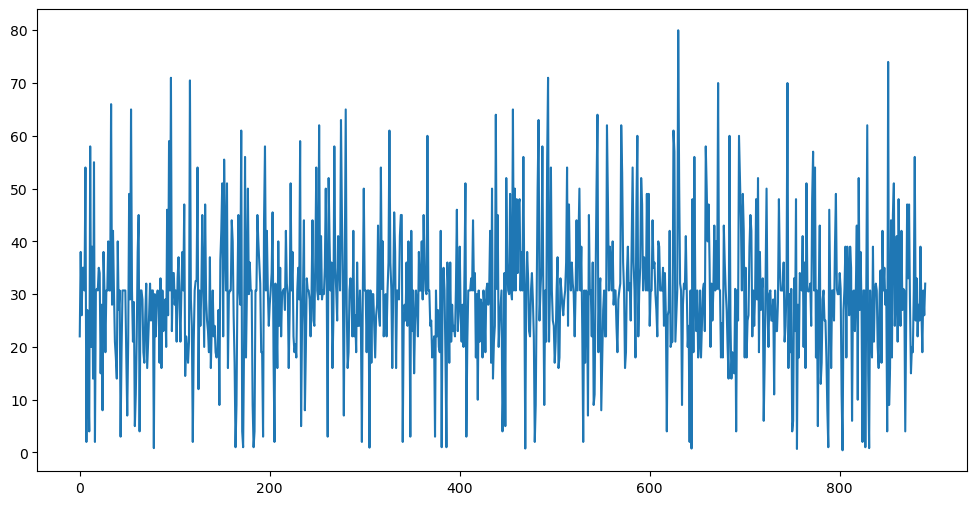

In [282]:
plt.figure(figsize = (12,6))
titanic.Age.plot()
plt.show()

In [283]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Class     891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       891 non-null    float64
 4   SipSp     891 non-null    int64  
 5   ParCh     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Emb       889 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB


### Categorical Data

#### Titanic Dataset

In [284]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [285]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Class     891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       891 non-null    float64
 4   SipSp     891 non-null    int64  
 5   ParCh     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Emb       889 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB


In [286]:
titanic.to_csv("titanic_clean.csv", index = False)

In [287]:
titanic.nunique()

Survived      2
Class         3
Gender        2
Age          89
SipSp         7
ParCh         7
Fare        248
Emb           3
dtype: int64

In [288]:
titanic[["Gender", "Emb"]].describe()

,Gender,Emb
count,891,889
unique,2,3
top,male,S
freq,577,644


In [289]:
titanic.Gender = titanic.Gender.astype("category")

In [290]:
titanic.Emb = titanic.Emb.astype("category")

In [294]:
#titanic.astype({"Gender":"category","Emb":"category"})  # it also works for doing at once

In [295]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int32   
 1   Class     891 non-null    int64   
 2   Gender    891 non-null    category
 3   Age       891 non-null    float64 
 4   SipSp     891 non-null    int64   
 5   ParCh     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Emb       889 non-null    category
dtypes: category(2), float64(2), int32(1), int64(3)
memory usage: 40.4 KB


In [296]:
titanic.Gender.dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

#### Olympic Dataset

In [297]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [298]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31161 non-null  int64 
 1   City          31161 non-null  object
 2   Sport         31161 non-null  object
 3   Discipline    31161 non-null  object
 4   Athlete_Name  31161 non-null  object
 5   Country       31161 non-null  object
 6   Gender        31161 non-null  object
 7   Event         31161 non-null  object
 8   Medal         31161 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


In [299]:
summer.to_csv("summer_clean.csv", index = False)

In [300]:
summer.describe(include = ["O"])

,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
count,31161,31161,31161,31161,31161,31161,31161,31161
unique,22,43,67,22760,147,2,666,3
top,London,Aquatics,Athletics,"Phelps, Michael",USA,Men,Football,Gold
freq,3563,4170,3637,22,4585,22744,1497,10484


In [301]:
summer.nunique()

Year               27
City               22
Sport              43
Discipline         67
Athlete_Name    22760
Country           147
Gender              2
Event             666
Medal               3
dtype: int64

In [302]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31161 non-null  int64 
 1   City          31161 non-null  object
 2   Sport         31161 non-null  object
 3   Discipline    31161 non-null  object
 4   Athlete_Name  31161 non-null  object
 5   Country       31161 non-null  object
 6   Gender        31161 non-null  object
 7   Event         31161 non-null  object
 8   Medal         31161 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


In [303]:
summer.City = summer.City.astype("category")

In [304]:
summer.Sport = summer.Sport.astype("category")

In [305]:
summer.Discipline = summer.Discipline.astype("category")

In [306]:
summer.Country = summer.Country.astype("category")

In [307]:
summer.Gender = summer.Gender.astype("category")

In [308]:
summer.Medal = summer.Medal.astype("category")

In [309]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Year          31161 non-null  int64   
 1   City          31161 non-null  category
 2   Sport         31161 non-null  category
 3   Discipline    31161 non-null  category
 4   Athlete_Name  31161 non-null  object  
 5   Country       31161 non-null  category
 6   Gender        31161 non-null  category
 7   Event         31161 non-null  object  
 8   Medal         31161 non-null  category
dtypes: category(6), int64(1), object(2)
memory usage: 2.2+ MB


### Pandas Version 1.0: NEW Dtypes and pd.NA 

In [310]:
import pandas as pd

In [311]:
titanic = pd.read_csv("titanic.csv")

In [312]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [313]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [314]:
titanic = titanic.convert_dtypes()

In [315]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.25,S,<NA>
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.925,S,<NA>
3,1,1,female,35.0,1,0,53.1,S,C
4,0,3,male,35.0,0,0,8.05,S,<NA>
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,<NA>
887,1,1,female,19.0,0,0,30.0,S,B
888,0,3,female,<NA>,1,2,23.45,S,<NA>
889,1,1,male,26.0,0,0,30.0,C,C


In [316]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    Int64  
 1   pclass    891 non-null    Int64  
 2   sex       891 non-null    string 
 3   age       714 non-null    Float64
 4   sibsp     891 non-null    Int64  
 5   parch     891 non-null    Int64  
 6   fare      891 non-null    Float64
 7   embarked  889 non-null    string 
 8   deck      203 non-null    string 
dtypes: Float64(2), Int64(4), string(3)
memory usage: 68.0 KB


In [317]:
titanic.iloc[0, -1]

<NA>

In [318]:
type(titanic.iloc[0, -1])

pandas._libs.missing.NAType

In [319]:
pd.NA

<NA>

In [320]:
np.nan

nan